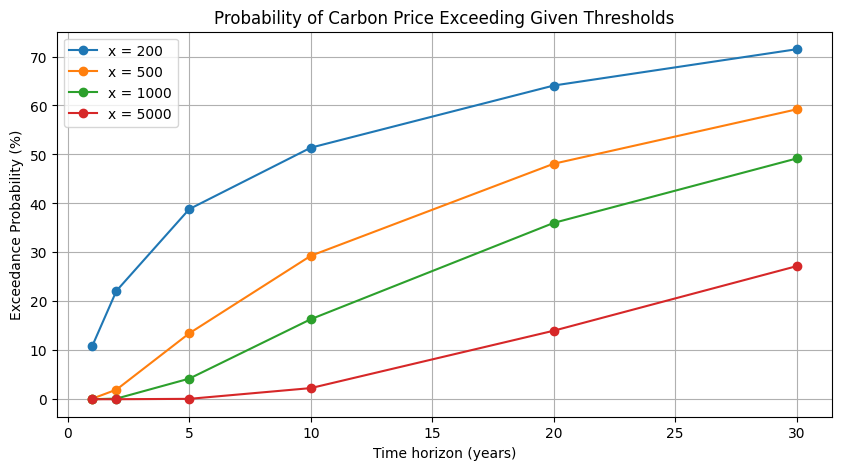

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for GBM
mu = 0.20  # Mean return (drift)
sigma = 0.50  # Volatility (diffusion)
CP0 = 100  # Initial carbon price
t_years = [1, 2, 5, 10, 20, 30]  # Time horizons (years)
n_sim = int(1e6)  # Number of simulations

# Generate GBM paths
np.random.seed(42)

def simulate_gbm(CP0, mu, sigma, T, n_sim):
    """Simulates geometric Brownian motion paths."""
    dt = 1  # Time step in years
    W = np.random.randn(n_sim) * np.sqrt(T)
    return CP0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * W)

# Compute exceedance probabilities
x_vals = [200, 500, 1000, 5000]
exceedance_probs = {x: [] for x in x_vals}

def compute_exceedance_probs(CP0, mu, sigma, x_vals, t_years, n_sim):
    """Computes exceedance probabilities for given thresholds."""
    for T in t_years:
        CP_T = simulate_gbm(CP0, mu, sigma, T, n_sim)
        for x in x_vals:
            exceedance_probs[x].append(np.mean(CP_T >= x) * 100)

compute_exceedance_probs(CP0, mu, sigma, x_vals, t_years, n_sim)

# Plot exceedance probabilities
plt.figure(figsize=(10, 5))
for x in x_vals:
    plt.plot(t_years, exceedance_probs[x], marker='o', label=f"x = {x}")
plt.xlabel("Time horizon (years)")
plt.ylabel("Exceedance Probability (%)")
plt.title("Probability of Carbon Price Exceeding Given Thresholds")
plt.legend()
plt.grid(True)
plt.show()

# Print results in tabular form
import pandas as pd

df_results = pd.DataFrame(exceedance_probs, index=t_years)
df_results.index.name = "Time Horizon (years)"
df_results.columns = [f"Pr(CP(T) ≥ {x}) (%)" for x in x_vals]


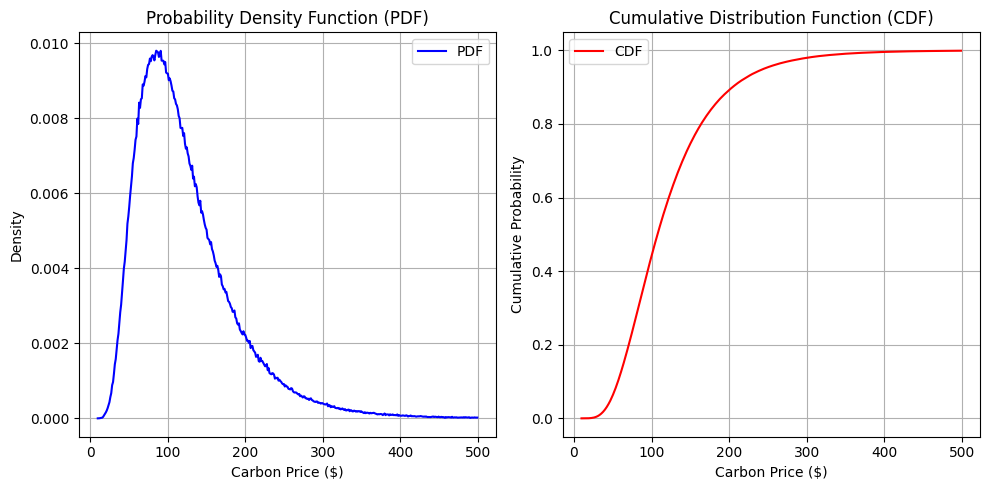

In [23]:
# Compute PDF and CDF for a specific year (e.g., 1 year)
CP_10 = simulate_gbm(CP0, mu, sigma, 1, n_sim)


def make_cdf(x, num_bins=1000):
    """
    Compute the empirical CDF of a given dataset.

    Parameters:
    x (array-like): Input data for which to compute the CDF.
    num_bins (int): Number of bins to use for the CDF estimation.

    Returns:
    x_range (numpy array): Sorted values of x for plotting.
    y (numpy array): Probability density function (PDF) values.
    z (numpy array): Cumulative distribution function (CDF) values.
    """
    # Define range for x
    min_x, max_x = np.min(x), np.max(x)
    x_range = np.linspace(min_x, max_x, num_bins)

    # Compute y: count occurrences in each bin
    y = np.zeros(len(x_range))
    for i in range(len(x_range) - 1):
        y[i+1] = np.sum((x >= x_range[i]) & (x < x_range[i+1]))

    # Normalize y to get a probability distribution
    y = y / np.sum(y)

    # Compute cumulative sum for the CDF
    z = np.zeros(len(y))
    for i in range(1, len(y)):
        z[i] = z[i-1] + y[i]

    return x_range, y, z

x_range, pdf_values, cdf_values = make_cdf(CP_10)


# User-defined range for visualization
price_min = 0  # Adjust as needed
price_max = 500  # Adjust as needed
valid_range = (x_range >= price_min) & (x_range <= price_max)
x_range_filtered = x_range[valid_range]
pdf_values_filtered = pdf_values[valid_range]
cdf_values_filtered = cdf_values[valid_range]

# Plot PDF and CDF
plt.figure(figsize=(10, 5))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x_range_filtered, pdf_values_filtered, label="PDF", color='b')
plt.xlabel("Carbon Price ($)")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x_range_filtered, cdf_values_filtered, label="CDF", color='r')
plt.xlabel("Carbon Price ($)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
